In [33]:
from fastai.vision import *

In [2]:
def create_path(name):
    folder = name
    file = '{}.csv'.format(name)
    path = Path('data/')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [3]:
create_path('happy')
create_path('sad')

In [4]:
path = Path('data')
classes = ['happy', 'sad']

In [5]:
path.ls()

[PosixPath('data/happy'),
 PosixPath('data/models'),
 PosixPath('data/sad'),
 PosixPath('data/cleaned.csv')]

In [34]:
download_images('data/happy/happy.csv', 'data/happy', max_pics=200)


In [35]:
download_images('data/sad/sad.csv', 'data/sad', max_pics=200)

In [36]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

happy


sad


In [37]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [38]:
data.classes

['happy', 'sad']

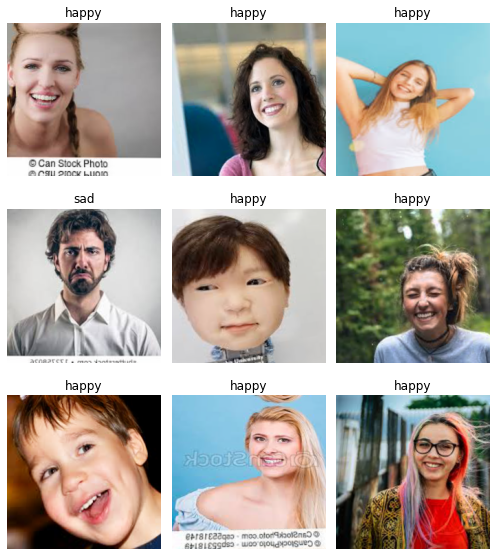

In [39]:
data.show_batch(rows=3, figsize=(7,8))

In [40]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['happy', 'sad'], 2, 288, 72)

In [41]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [42]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.258849,1.125809,0.361111,00:02
1,1.067073,1.056194,0.250000,00:02
2,0.936732,0.993948,0.263889,00:02
3,0.818120,0.893807,0.305556,00:02


In [43]:
learn.save('stage-1')

In [44]:
learn.unfreeze()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


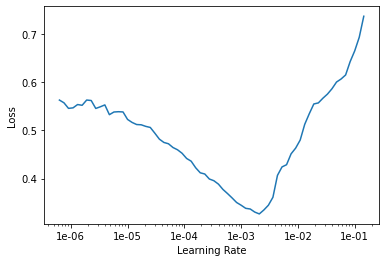

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,4e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.301404,5.879043,0.361111,00:02
1,1.193055,2.722495,0.291667,00:02


In [48]:
learn.save('stage-2')

In [49]:
interp = ClassificationInterpretation.from_learner(learn)

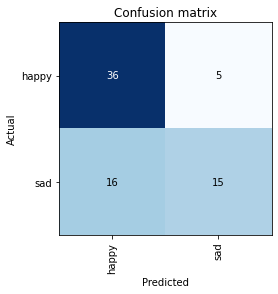

In [50]:
interp.plot_confusion_matrix()

In [51]:
from fastai.widgets import *

In [52]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [53]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [54]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [55]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [56]:
np.random.seed(42)
data_clean = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [57]:
learn_2 = cnn_learner(data_clean, models.resnet34, metrics=error_rate)

In [75]:
learn_2.fit_one_cycle(20, max_lr=slice(1e-5,4e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.174875,1.730906,0.222222,00:02
1,0.152351,1.624322,0.222222,00:02
2,0.129465,1.477848,0.208333,00:02
3,0.138884,1.426806,0.208333,00:02
4,0.115568,1.599830,0.180556,00:02
5,0.115367,1.706946,0.208333,00:02
6,0.117427,1.643780,0.250000,00:02
7,0.117267,1.593439,0.222222,00:02
8,0.118385,2.012486,0.180556,00:02
9,0.126706,1.848541,0.180556,00:02


In [76]:
interp_2 = ClassificationInterpretation.from_learner(learn_2)

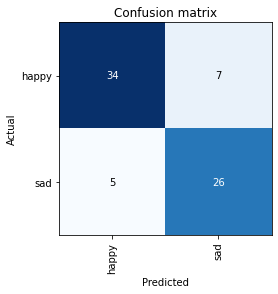

In [77]:
interp_2.plot_confusion_matrix()

In [71]:
learn_2.export()